# Sleeping Time-Series Analysis

In [54]:
# Import Packages

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
# Read in the Dataset

df = pd.read_excel('Data/Time_Americans_Spend_Sleeping.xlsx')
df.head()

,Year,Period,Avg hrs per day sleeping,Standard Error,Type of Days,Age Group,Activity,Sex
0,2003,Annual,8.57,0.018,All days,15 years and over,Sleeping,Both
1,2004,Annual,8.55,0.026,All days,15 years and over,Sleeping,Both
2,2005,Annual,8.62,0.023,All days,15 years and over,Sleeping,Both
3,2006,Annual,8.63,0.024,All days,15 years and over,Sleeping,Both
4,2007,Annual,8.57,0.024,All days,15 years and over,Sleeping,Both


In [56]:
df.tail()

,Year,Period,Avg hrs per day sleeping,Standard Error,Type of Days,Age Group,Activity,Sex
940,2013,Annual,8.83,0.085,Nonholiday weekdays,65 years and over,Sleeping,Women
941,2014,Annual,8.98,0.086,Nonholiday weekdays,65 years and over,Sleeping,Women
942,2015,Annual,8.83,0.074,Nonholiday weekdays,65 years and over,Sleeping,Women
943,2016,Annual,8.92,0.071,Nonholiday weekdays,65 years and over,Sleeping,Women
944,2017,Annual,8.81,0.091,Nonholiday weekdays,65 years and over,Sleeping,Women


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      945 non-null    int64  
 1   Period                    945 non-null    object 
 2   Avg hrs per day sleeping  945 non-null    float64
 3   Standard Error            945 non-null    float64
 4   Type of Days              945 non-null    object 
 5   Age Group                 945 non-null    object 
 6   Activity                  945 non-null    object 
 7   Sex                       945 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 59.2+ KB


In [58]:
df.describe()

,Year,Avg hrs per day sleeping,Standard Error
count,945.000000,945.000000,945.000000
mean,2010.000000,8.806868,0.086958
std,4.322782,0.545001,0.034631
min,2003.000000,7.720000,0.018000
25%,2006.000000,8.360000,0.063000
50%,2010.000000,8.810000,0.084000
75%,2014.000000,9.190000,0.106000
max,2017.000000,10.650000,0.228000


## Data Cleaning

In [59]:
# Changing Column names

column_names = {'Year': 'year', 'Period':'period', 'Avg hrs per day sleeping':'avg_sleeping_time', 'Standard Error': 'std_err', 'Type of Days': 'day_type', 'Age Group':'age_group', 'Activity':'activity', 'Sex':'sex'}

df.rename(columns=column_names, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               945 non-null    int64  
 1   period             945 non-null    object 
 2   avg_sleeping_time  945 non-null    float64
 3   std_err            945 non-null    float64
 4   day_type           945 non-null    object 
 5   age_group          945 non-null    object 
 6   activity           945 non-null    object 
 7   sex                945 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 59.2+ KB


## Exploratory Data Analysis

In [61]:
# Exploring the Year column

df['year'].value_counts()

year
2003    63
2004    63
2005    63
2006    63
2007    63
2008    63
2009    63
2010    63
2011    63
2012    63
2013    63
2014    63
2015    63
2016    63
2017    63
Name: count, dtype: int64

/Users/dre/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dre/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dre/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/dre/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

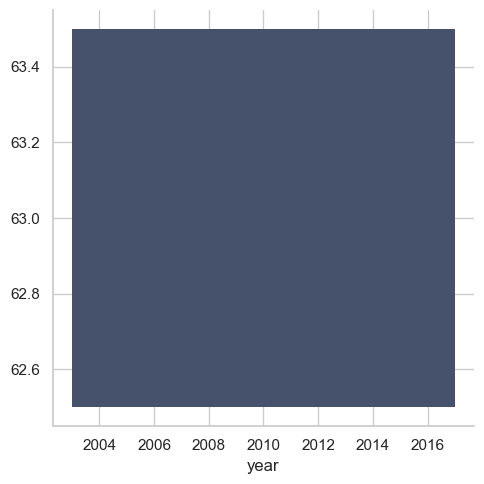

In [62]:
# Visualizing the Year Column

X_year = df['year'].value_counts().index
Y_year = df['year'].value_counts().values

sns.displot(x=X_year, y=Y_year)




In [63]:
df['period'].value_counts()

period
Annual    945
Name: count, dtype: int64

In [64]:
df['avg_sleeping_time'].value_counts()

avg_sleeping_time
9.34    14
8.36    13
8.93    10
8.91    10
8.97    10
        ..
7.88     1
7.76     1
7.83     1
7.72     1
7.90     1
Name: count, Length: 221, dtype: int64

In [65]:
df['std_err'].value_counts()

std_err
0.072    17
0.077    16
0.092    16
0.101    15
0.086    14
         ..
0.214     1
0.159     1
0.177     1
0.025     1
0.145     1
Name: count, Length: 157, dtype: int64

In [66]:
df['day_type'].value_counts()

day_type
All days                     315
Nonholiday weekdays          315
Weekend days and holidays    315
Name: count, dtype: int64

In [67]:
df['age_group'].value_counts()

age_group
15 years and over    135
15 to 24 years       135
25 to 34 years       135
35 to 44 years       135
45 to 54 years       135
55 to 64 years       135
65 years and over    135
Name: count, dtype: int64

In [68]:
df['activity'].value_counts()

activity
Sleeping    945
Name: count, dtype: int64

In [69]:
df['sex'].value_counts()

sex
Both     315
Men      315
Women    315
Name: count, dtype: int64

## Data Visualization

/Users/dre/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dre/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dre/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dre/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a futu

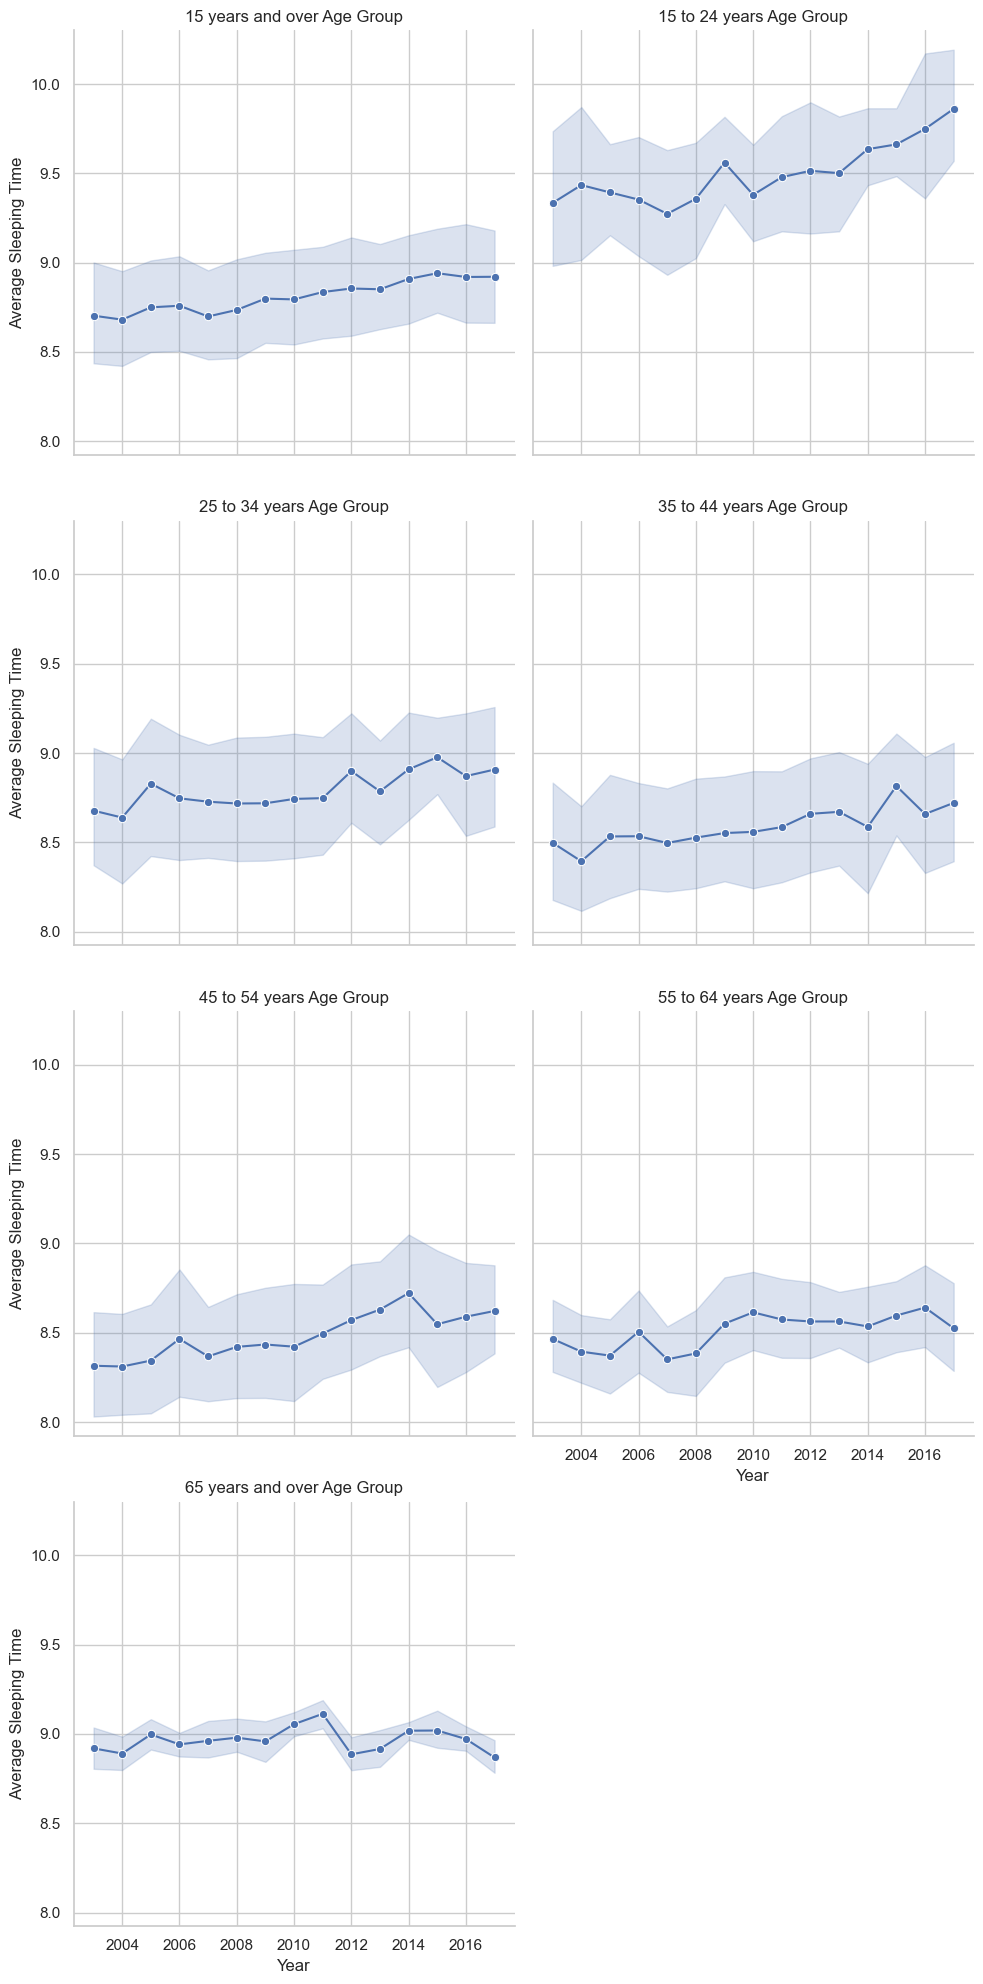

In [70]:
sns.set(style="whitegrid")

graph = sns.FacetGrid(df, col='age_group', col_wrap=2, height=5)
graph.map(sns.lineplot, 'year', 'avg_sleeping_time', marker='o')

graph.set_axis_labels('Year', 'Average Sleeping Time')
graph.set_titles(col_template="{col_name} Age Group")

plt.show();

## Creating Master Dataset

In [78]:
# Dropping columns Period and Activity
master_df = df.drop(columns=['period', 'activity'])

# Filtering based on Age Group and Sex
master_df = master_df.loc[master_df['age_group'] == '15 to 24 years']
master_df = master_df.loc[master_df['sex'] == 'Men']

master_df.head()

,year,avg_sleeping_time,std_err,day_type,age_group,sex
360,2003,9.14,0.095,All days,15 to 24 years,Men
361,2004,9.12,0.109,All days,15 to 24 years,Men
362,2005,9.20,0.118,All days,15 to 24 years,Men
363,2006,9.21,0.108,All days,15 to 24 years,Men
364,2007,9.03,0.125,All days,15 to 24 years,Men


In [79]:
master_df['age_group'].value_counts()

age_group
15 to 24 years    45
Name: count, dtype: int64

In [80]:
master_df['sex'].value_counts()

sex
Men    45
Name: count, dtype: int64

## Train Test Split

Train = df.loc[df['year] > 2016]
test = df.loc[df['year] <= 2016]